# Summary : File for training the  posenet coordinates and generating the model for classification.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# first neural network with keras make predictions
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import SGD, Adam, Adadelta, RMSprop

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'keras.wrappers'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from scikeras.wrappers import KerasClassifier


In [2]:
#Provide link to the dataset from google drive. 
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Unnamed: 0,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,target
0,0,0.639426,0.521434,0.643007,0.507005,0.645659,0.510225,0.618763,0.465043,0.626231,...,0.662763,0.539647,0.775719,0.547125,0.768725,0.700679,0.880818,0.682206,0.852564,downdog
1,1,0.646277,0.557455,0.650590,0.575722,0.647756,0.575761,0.625084,0.605370,0.616791,...,0.414306,0.536279,0.299708,0.541790,0.305485,0.671407,0.182439,0.679371,0.174664,downdog
2,2,0.662042,0.597410,0.662268,0.619267,0.666776,0.619184,0.615940,0.659094,0.617544,...,0.385757,0.537658,0.222787,0.540500,0.222110,0.730794,0.110817,0.744744,0.087836,downdog
3,3,0.665385,0.538834,0.671393,0.555869,0.671829,0.555763,0.644372,0.604747,0.642114,...,0.408862,0.533071,0.301085,0.532537,0.301972,0.693779,0.195193,0.702423,0.182191,downdog
4,4,0.608186,0.363585,0.614888,0.346512,0.616283,0.348574,0.573348,0.309025,0.578755,...,0.557455,0.486637,0.708321,0.492528,0.698939,0.682720,0.836955,0.671492,0.807916,downdog


In [4]:
df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
#Cleaning the data => Removing columns with nose, ear and eye
points_to_remove = ['nose','ear','eye']
for c in df.columns:
       for point in points_to_remove:
         if(point in c):
           print("Drop : ",c)
           df.drop(c, axis=1, inplace=True)

Drop :  nose_x
Drop :  nose_y
Drop :  left_eye_x
Drop :  left_eye_y
Drop :  right_eye_x
Drop :  right_eye_y
Drop :  left_ear_x
Drop :  left_ear_y
Drop :  right_ear_x
Drop :  right_ear_y


In [6]:
df.shape
#25 columns in the data frame => taking 24 co ordinates to detect a pose

(464, 25)

In [7]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_elbow_x', 'left_elbow_y', 'right_elbow_x',
       'right_elbow_y', 'left_wrist_x', 'left_wrist_y', 'right_wrist_x',
       'right_wrist_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'target'],
      dtype='object')

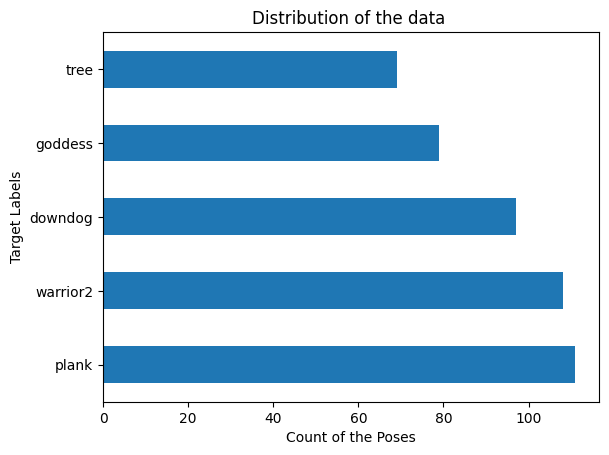

In [8]:
#Showing the number of images present for each yoga pose 
df.target.value_counts().plot(kind='barh')
plt.title("Distribution of the data ")
plt.xlabel("Count of the Poses")
plt.ylabel("Target Labels")
plt.show()

In [9]:
#Separating input(X=>all the coordinates of joints) and output(Y=>pose) data 
X = df.drop(columns=['target'])
y_temp = df['target']

In [10]:
#Encoding the target variables with labels for each class 
le = preprocessing.LabelEncoder()
y = le.fit_transform(y_temp)

In [11]:
#showing labels assigned to each pose 
poses = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
encoded_data, mapping_index = pd.Series(poses).factorize()
for data in encoded_data:
    print(data, mapping_index[data])

0 downdog
1 goddess
2 plank
3 tree
4 warrior2


In [17]:
#plotting the correlation matrix 
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
search = '_x'

plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

ValueError: could not convert string to float: 'downdog'

<Figure size 1900x1500 with 0 Axes>

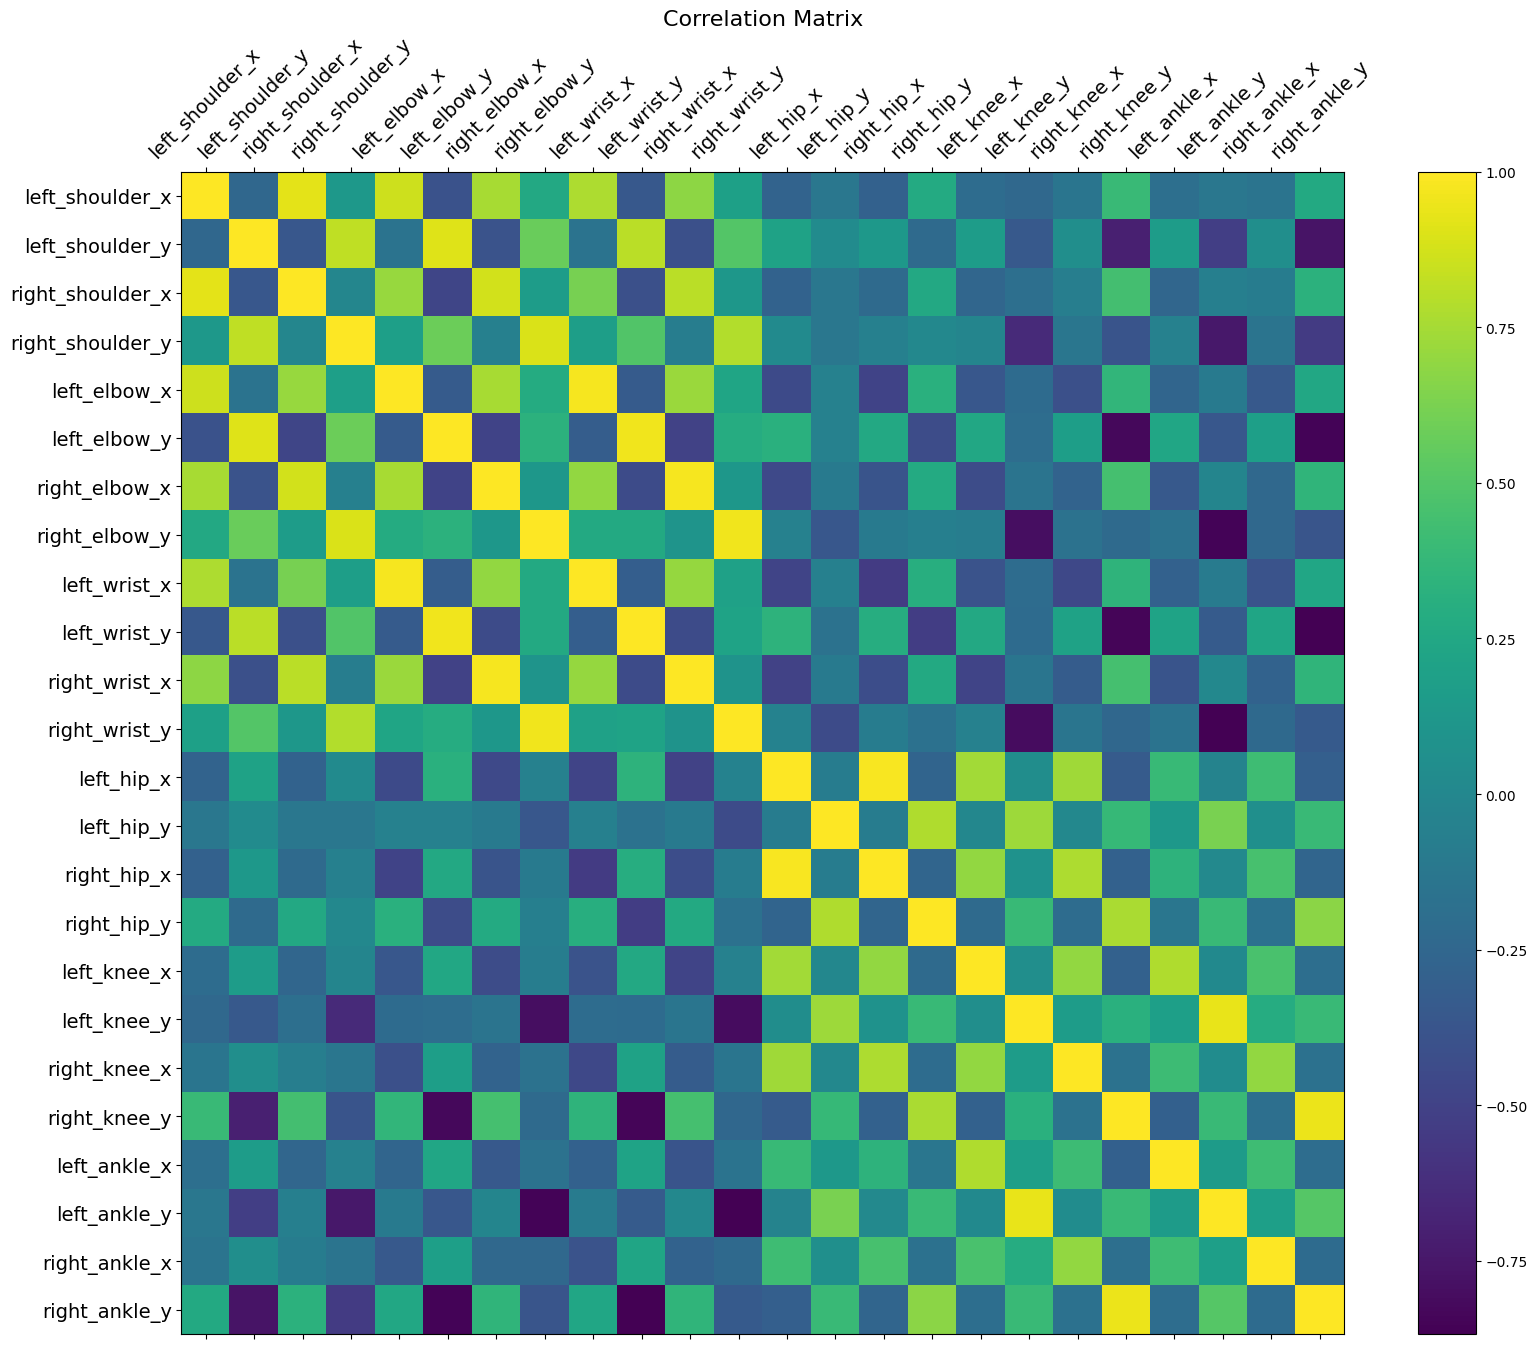

In [12]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(numeric_df.corr(), fignum=f.number)

plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=14)
plt.colorbar()
plt.title('Correlation Matrix', fontsize=16)
plt.show()


#Training Model

In [13]:
#splitting the train and test datas 
X_dev, X_test, y_dev, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
#Splitting the data into validation and train test
X_train, X_val, y_train, y_val = train_test_split( X_dev, y_dev, test_size=0.20, random_state=42)

In [14]:
print("Shape of the dataset")
print("Train ", X_train.shape)
print("Test ", X_test.shape)
print("Validation ", X_val.shape)
input_shape = X_train.shape

Shape of the dataset
Train  (296, 24)
Test  (93, 24)
Validation  (75, 24)


In [21]:
#Building custom model 
model = Sequential()
model.add(Dense(32,  activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(32, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(32, activation = "softmax"))
model.compile(Adam(lr = 0.01), "sparse_categorical_crossentropy", metrics = ["accuracy"])

W0000 00:00:1731940123.908217  122204 gpu_device.cc:2433] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 3.5. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1731940123.911110  122204 gpu_device.cc:2433] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 3.5. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.


InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [15]:
import tensorflow as tf

# Disable all GPUs
tf.config.set_visible_devices([], 'GPU')

# Alternatively, you can disable only a specific GPU if needed:
# tf.config.set_visible_devices([0], 'GPU')  # Enable specific GPU


In [16]:
model = Sequential()

# Add layers to the model
model.add(Dense(32, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))

# Output layer - ensure the number of units matches the number of classes
model.add(Dense(107, activation="softmax"))  # Update the number 32 to match your number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.build(input_shape)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (296, 32)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (296, 128)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (296, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (296, 32)              │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (296, 128)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (296, 64)              │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (296, 64)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (296, 107)             │         6,955 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,587 (111.67 KB)

 Trainable params: 28,587 (111.67 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train, y_train, verbose=1, validation_data=(X_val, y_val), epochs=60)

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.1344 - loss: 3.6943 - val_accuracy: 0.1733 - val_loss: 1.8521
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1886 - loss: 1.8634 - val_accuracy: 0.1867 - val_loss: 1.6009
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2375 - loss: 1.6308 - val_accuracy: 0.4000 - val_loss: 1.4995
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2864 - loss: 1.5203 - val_accuracy: 0.5333 - val_loss: 1.3130
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3580 - loss: 1.3062 - val_accuracy: 0.4267 - val_loss: 1.0429
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4558 - loss: 1.1296 - val_accuracy: 0.3333 - val_loss: 1.4194
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2409 - loss: 1.5544 - val_accuracy: 0.6667 - val_loss: 1.0335
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4303 - loss: 1.1708 - val_accuracy: 0.3067 - val_loss

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

model = Sequential()

# Input layer with more neurons
model.add(Dense(512, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden layers
model.add(Dense(512, activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(107, activation="softmax"))

# Compile the model with Nadam optimizer and lower learning rate
model.compile(optimizer=Nadam(learning_rate=0.0005), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)

# Model summary
model.summary()

# Train the model with additional epochs and a larger batch size
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=500,  # Increased number of epochs
                    batch_size=128,  # Larger batch size for better generalization
                    callbacks=[early_stopping, reduce_lr], 
                    verbose=1)


/home/samapankar/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 512)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 107)            │         6,955 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,779 (1.76 MB)

 Trainable params: 457,835 (1.75 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.0104 - loss: 6.2773 - val_accuracy: 0.0083 - val_loss: 5.7947 - learning_rate: 5.0000e-04
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0175 - loss: 5.9845 - val_accuracy: 0.0094 - val_loss: 5.7673 - learning_rate: 5.0000e-04
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0411 - loss: 5.6983 - val_accuracy: 0.0094 - val_loss: 5.7430 - learning_rate: 5.0000e-04
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0522 - loss: 5.4778 - val_accuracy: 0.0125 - val_loss: 5.7208 - learning_rate: 5.0000e-04
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0751 - loss: 5.3048 - val_accuracy: 0.0188 - val_loss: 5.7033 - learning_rate: 5.0000e-04
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0887 - loss: 5.1505 - val_accuracy: 0.0188 - val_loss: 5.6866 - learning_rate: 5.0000e-04
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_matrix(y_test, y_pred_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[27,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  4],
       [ 1,  0, 15,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  2,  1,  1, 29]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.71      0.56      0.62         9
           2       0.94      0.94      0.94        16
           3       0.89      1.00      0.94         8
           4       0.88      0.88      0.88        33

    accuracy                           0.90        93
   macro avg       0.88      0.87      0.87        93
weighted avg       0.90      0.90      0.90        93



In [21]:
#Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")